In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import time
import numpy as np
import cv2
import scipy.special
import matplotlib.pyplot as plt
import os
import csv

from os import listdir
from os.path import isfile, join
import pandas

In [3]:
# neural network class definition
class neuralNetwork :

    # initialise the neural network
    def __init__(self, inputnodes, outputnodes,learningrate) :

        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        
        self.onodes = outputnodes

        #set weight
        self.w = np.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.inodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    # train the neural network
    def train(self, inputs_list, targets_list) :

        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        # print('targets = ', targets)

        
        w_dot_input = np.dot(self.w, inputs)
        
        outputs = self.activation_function(w_dot_input)
        #print('final_outputs = ', outputs)

        # output layer error is the (target actual)
        output_errors = targets-outputs
        # print('output_errors = ', output_errors)
        
        
        # update the weights 
        self.dw = self.lr * np.dot(output_errors,np.transpose(inputs))
        self.w += self.lr * np.dot((output_errors*outputs * (1.0-outputs)),np.transpose(inputs))+(0.8*self.dw)


        # print("*********")
        pass

    # query the neural network
    def query(self, inputs_list) :

        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T


        output = np.dot(self.w, inputs)

        # calculate the signals emerging 
        final_outputs = self.activation_function(output)

        return final_outputs
    # def write_weight(self) :
    #     f = open('who.txt','w',encoding='utf-8')
    #     f.write(str(self.who))
    #     f.close()
    #     f = open('wih.txt','w',encoding='utf-8')
    #     f.write(str(self.wih))
    #     f.close()
    #     print('already write!! ')
        

round 1


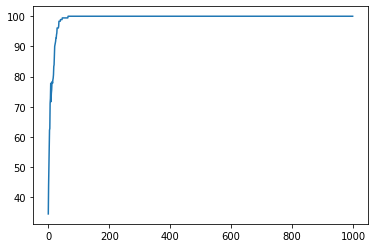

100.0
65


In [4]:
#round 1
accuracy_each_epochs = []

input_nodes = 3780
output_nodes = 4


learning_rate = 0.1


###

n = neuralNetwork(input_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
img_data= pandas.read_csv('drive/My Drive/korat_sauce/img_hog.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])


epochs = 1000
for e in range(epochs):
    
    for num_row_data in range(len(train_data_list)):
        
        
        inputs = train_data_list[num_row_data] +0.01
        
        
        targets = np.zeros(output_nodes) + 0.01
        
        
        targets[int(sol_of_train_data[num_row_data])-1] = 0.99
        n.train(inputs, targets)
        pass
    pass

    #test
    img_data_test= pandas.read_csv('drive/My Drive/korat_sauce/test_img_csv.csv', header = None,na_values=0)
    img_data_test = img_data_test.replace(np.nan,0)
    train_data_list_test = np.array(img_data_test.loc[:, img_data_test.columns != 0])
    sol_of_train_data_test = np.array(img_data_test[0])

    scorecard = []

    # go through all the records in the test data set
    for num_row_data in range(len(train_data_list_test)):
        
        correct_label = int(sol_of_train_data_test[num_row_data])-1
        
        
        inputs = train_data_list_test[num_row_data] +0.01
        
        
        outputs = n.query(inputs)
        
        # the index of the highest value corresponds to the label
        label = np.argmax(outputs)
        
        # append correct or incorrect to list
        if (label == correct_label):
            
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    # calculate the performance score, the fraction of correct answers
    scorecard_array = np.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)
    accuracy_each_epochs.append(scorecard_array.sum() /scorecard_array.size*100)

print('round 1')
plt.plot(np.arange(len(accuracy_each_epochs)),np.array(accuracy_each_epochs)) 
plt.show()
print(max(accuracy_each_epochs))
print(np.argmax(accuracy_each_epochs))

round 2


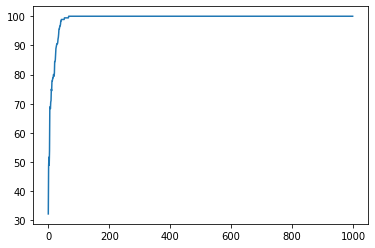

100.0
67


In [5]:
#round 2
accuracy_each_epochs = []

input_nodes = 3780
output_nodes = 4


learning_rate = 0.1


###

n = neuralNetwork(input_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
img_data= pandas.read_csv('drive/My Drive/korat_sauce/img_hog.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])


epochs = 1000
for e in range(epochs):
    
    for num_row_data in range(len(train_data_list)):
        
        
        inputs = train_data_list[num_row_data] +0.01
        
        
        targets = np.zeros(output_nodes) + 0.01
        
        
        targets[int(sol_of_train_data[num_row_data])-1] = 0.99
        n.train(inputs, targets)
        pass
    pass

    #test
    img_data_test= pandas.read_csv('drive/My Drive/korat_sauce/test_img_csv.csv', header = None,na_values=0)
    img_data_test = img_data_test.replace(np.nan,0)
    train_data_list_test = np.array(img_data_test.loc[:, img_data_test.columns != 0])
    sol_of_train_data_test = np.array(img_data_test[0])

    scorecard = []

    # go through all the records in the test data set
    for num_row_data in range(len(train_data_list_test)):
        
        correct_label = int(sol_of_train_data_test[num_row_data])-1
        
        
        inputs = train_data_list_test[num_row_data] +0.01
        
        
        outputs = n.query(inputs)
        
        # the index of the highest value corresponds to the label
        label = np.argmax(outputs)
        
        # append correct or incorrect to list
        if (label == correct_label):
            
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    # calculate the performance score, the fraction of correct answers
    scorecard_array = np.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)
    accuracy_each_epochs.append(scorecard_array.sum() /scorecard_array.size*100)
print('round 2')
plt.plot(np.arange(len(accuracy_each_epochs)),np.array(accuracy_each_epochs)) 
plt.show()
print(max(accuracy_each_epochs))
print(np.argmax(accuracy_each_epochs))

round 3


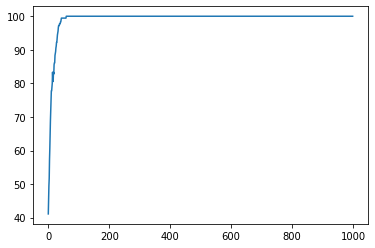

100.0
59


In [6]:
#round 3
accuracy_each_epochs = []

input_nodes = 3780
output_nodes = 4


learning_rate = 0.1


###

n = neuralNetwork(input_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
img_data= pandas.read_csv('drive/My Drive/korat_sauce/img_hog.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])


epochs = 1000
for e in range(epochs):
    
    for num_row_data in range(len(train_data_list)):
        
        
        inputs = train_data_list[num_row_data] +0.01
        
        
        targets = np.zeros(output_nodes) + 0.01
        
        
        targets[int(sol_of_train_data[num_row_data])-1] = 0.99
        n.train(inputs, targets)
        pass
    pass

    #test
    img_data_test= pandas.read_csv('drive/My Drive/korat_sauce/test_img_csv.csv', header = None,na_values=0)
    img_data_test = img_data_test.replace(np.nan,0)
    train_data_list_test = np.array(img_data_test.loc[:, img_data_test.columns != 0])
    sol_of_train_data_test = np.array(img_data_test[0])

    scorecard = []

    # go through all the records in the test data set
    for num_row_data in range(len(train_data_list_test)):
        
        correct_label = int(sol_of_train_data_test[num_row_data])-1
        
        
        inputs = train_data_list_test[num_row_data] +0.01
        
        
        outputs = n.query(inputs)
        
        # the index of the highest value corresponds to the label
        label = np.argmax(outputs)
        
        # append correct or incorrect to list
        if (label == correct_label):
            
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    # calculate the performance score, the fraction of correct answers
    scorecard_array = np.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)
    accuracy_each_epochs.append(scorecard_array.sum() /scorecard_array.size*100)
print('round 3')
plt.plot(np.arange(len(accuracy_each_epochs)),np.array(accuracy_each_epochs)) 
plt.show()
print(max(accuracy_each_epochs))
print(np.argmax(accuracy_each_epochs))